# Ejercicio: Perfiles de Twitter

A continuación, vamos a realizar un ejercicio donde vamos a intentar extraer la forma de expresarse de diferentes celebridades en Twitter para ver si es algo común a la profesión que desempeñan. Para ello, haremos una agrupación en base al número de palabras que utilizan, su empatía y su extraversión.

### Importa los datos y las librerías necesarias

Los datos están en el csv "twitter.csv"

In [95]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("twitter.csv")
df

,usuario,n_palabras,empatia,extraversion,profesion
0,3gerardpique,37.0945,29.370315,41.948819,7
1,aguerosergiokun,78.7970,24.279098,37.938947,7
2,albertochicote,49.2604,34.645521,38.999896,4
3,AlejandroSanz,80.4538,31.082154,52.337538,2
4,alfredocasero1,47.0645,31.138871,48.530806,4
...,...,...,...,...,...
135,XabiAlonso,47.5420,31.624351,38.904885,7
136,XaviRodriguez,47.5625,40.096458,48.533125,4
137,xoellopez,74.3065,19.093548,27.571210,2
138,ZacEfron,118.6107,23.008168,36.465344,1


### Análisis descriptivo

Estos datos hacen referencia a:
 * **usuario**: cuenta de Twitter de la celebridad
 * **n_palabras**: media de palabras que utiliza la cuenta en sus mensajes
 * **empatia**: grado de empatía del usuario
 * **extraversion**: grado de extraversión del usuario
 * **profesion**: profesión que desempeña el usuario. Sus valores son:
   * 1: Actor/actriz
   * 2: Cantante
   * 3: Modelo
   * 4: TV
   * 5: Radio
   * 6: Tecnología
   * 7: Deportes
   * 8: Político
   * 9: Escritor
 
Como hemos comentado al principio, vamos a utilizar las columnas ``n_palabras``, ``empatia`` y ``extraversion``:
1. Dibuja el histograma de cada una de ellas
2. Realiza una representación de cada pareja de las variables, donde el color represente la profesión del usuario

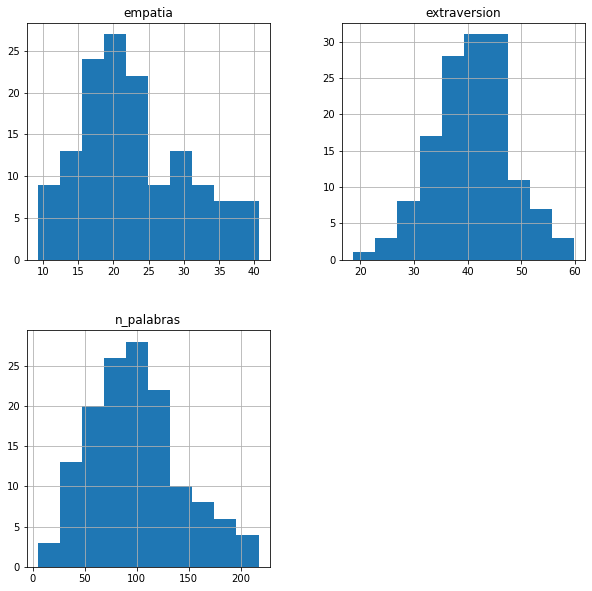

In [96]:
df[['n_palabras', 'empatia', 'extraversion']].hist(figsize=(10, 10));

In [97]:
sorted(df['profesion'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

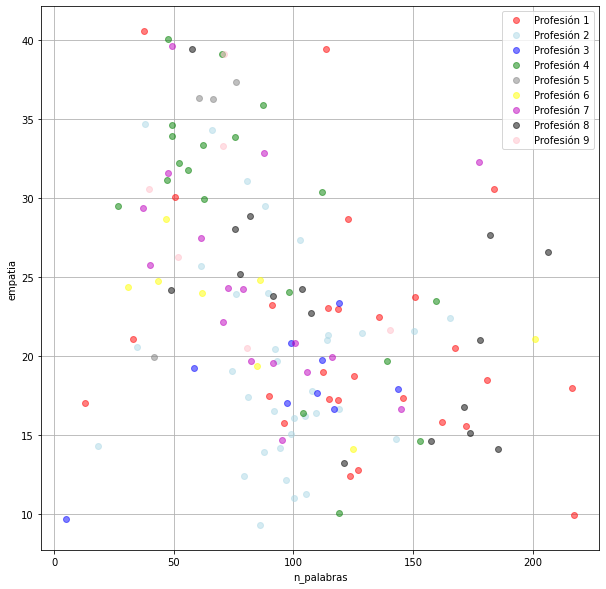

In [98]:
colors = ['r', 'lightblue', 'blue', 'green', 'grey', 'yellow', 'm', 'k', 'pink']

plt.figure(figsize=(10, 10))

for profesion in sorted(df['profesion'].unique()):
        plt.plot(df[df['profesion'] == profesion]['n_palabras'],
                 df[df['profesion'] == profesion]['empatia'], 
                 'o', 
                 color=colors[profesion-1],
                 alpha=0.5,
                 label=f'Profesión {profesion}')
plt.xlabel("n_palabras")
plt.ylabel("empatia")
plt.grid()
plt.legend();

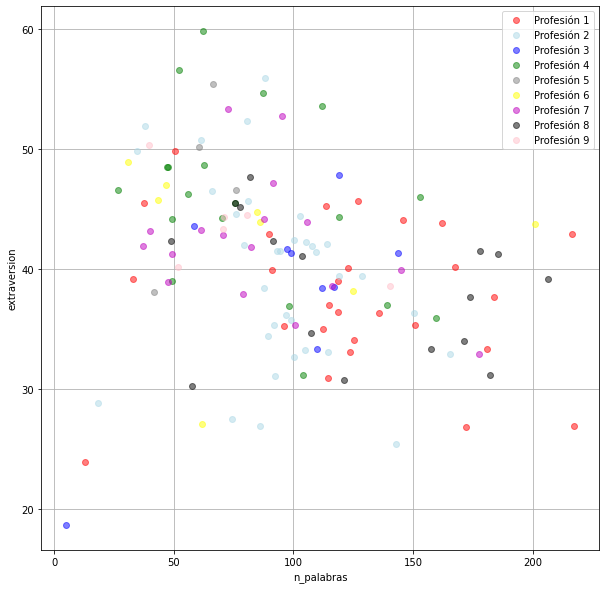

In [99]:
colors = ['r', 'lightblue', 'blue', 'green', 'grey', 'yellow', 'm', 'k', 'pink']

plt.figure(figsize=(10, 10))

for profesion in sorted(df['profesion'].unique()):
        plt.plot(df[df['profesion'] == profesion]['n_palabras'],
                 df[df['profesion'] == profesion]['extraversion'], 
                 'o', 
                 color=colors[profesion-1],
                 alpha=0.5,
                 label=f'Profesión {profesion}')
plt.xlabel("n_palabras")
plt.ylabel("extraversion")
plt.grid()
plt.legend();

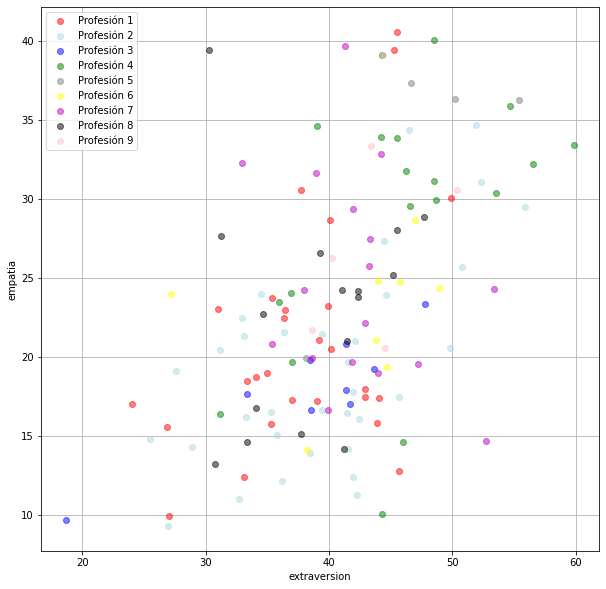

In [100]:
colors = ['r', 'lightblue', 'blue', 'green', 'grey', 'yellow', 'm', 'k', 'pink']

plt.figure(figsize=(10, 10))

for profesion in sorted(df['profesion'].unique()):
        plt.plot(df[df['profesion'] == profesion]['extraversion'],
                 df[df['profesion'] == profesion]['empatia'], 
                 'o', 
                 color=colors[profesion-1],
                 alpha=0.5,
                 label=f'Profesión {profesion}')
plt.xlabel("extraversion")
plt.ylabel("empatia")
plt.grid()
plt.legend();

#### Calcula el k óptimo

Para ello, utiliza los 2 métodos principales que hemos visto: inertia+elbow y silhouette_score. Evalúa, como mucho, hasta k = 20.

EXTRA: Utiliza el método gráfico basado en el Silhouette score.

In [101]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("twitter.csv")

X_cols = ['n_palabras', 'empatia', 'extraversion']
X = df[X_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
lista_kmeans = []
for k in range(2, 10):
    modelo_kmeans = KMeans(n_clusters=k)
    modelo_kmeans.fit(X_scaled)
    lista_kmeans.append(modelo_kmeans)
    

In [103]:
lista_kmeans

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [104]:
lista_inertias = []
for k in range(2, 10):
    modelo_kmeans = lista_kmeans[k-2]
    inertia_modelo = modelo_kmeans.inertia_
    lista_inertias.append(inertia_modelo)
    

In [105]:
lista_inertias

[233.33966283747162,
 180.41925145083536,
 147.57623408906665,
 129.34392008227118,
 112.90698701582917,
 98.90206893742742,
 90.04108793532318,
 82.68573429113772]

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_models = [KMeans(n_clusters = k).fit(X_scaled) for k in range(2, 20)]
inertias = [k_model.inertia_ for k_model in k_models]
silhouette_scores = [silhouette_score(X_scaled, k_model.labels_) for k_model in k_models]

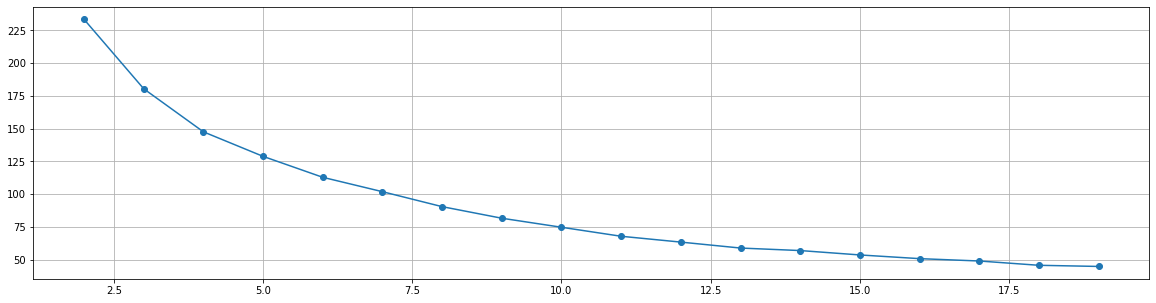

In [116]:
plt.figure(figsize=(20, 5))
plt.plot([kmeans.n_clusters for kmeans in k_models], inertias, 'o-')
plt.grid()

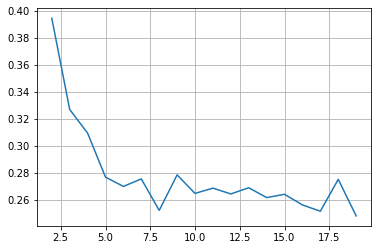

In [117]:
plt.plot([kmeans.n_clusters for kmeans in k_models], silhouette_scores)
plt.grid()

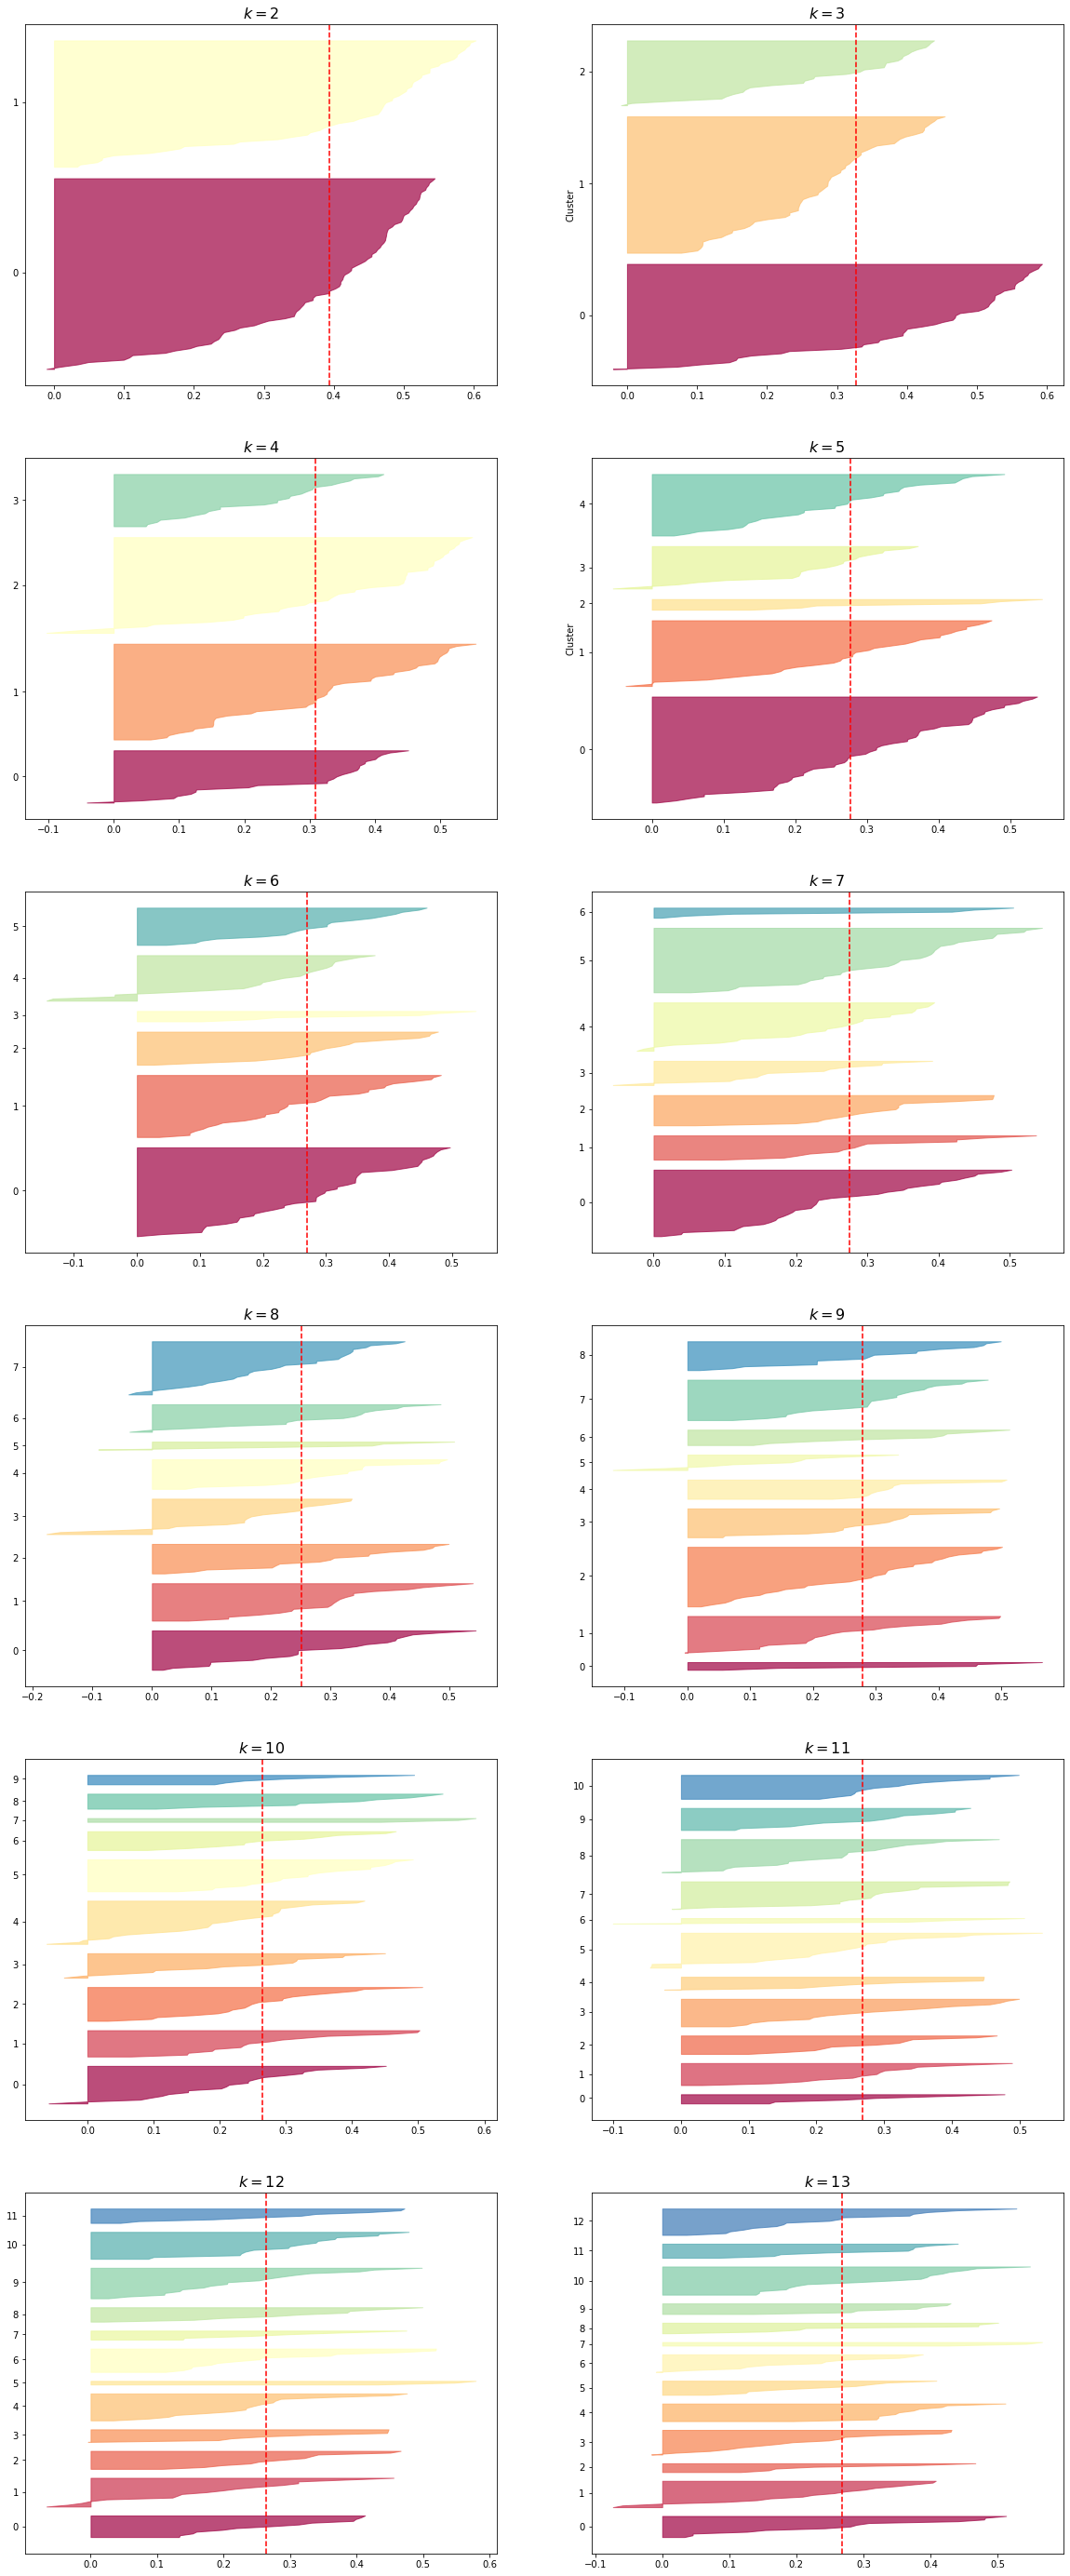

In [120]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

plt.figure(figsize=(20, 50))

for k in (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13):
    plt.subplot(6, 2, k - 1)
    
    y_pred = k_models[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
#     if k in (5, 6):
#         plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#         plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

    
plt.show()

In [121]:
k=2

#### Crea el modelo KMeans

En base al k que acabas de obtener, crea el modelo no supervisado con el algoritmo KMeans. Además, créate un DataFrame con X y añade las predicciones en una nueva columna 'preds'.

In [157]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [158]:
X['cluster'] = kmeans.labels_

In [159]:
X

,n_palabras,empatia,extraversion,cluster
0,37.0945,29.370315,41.948819,1
1,78.7970,24.279098,37.938947,0
2,49.2604,34.645521,38.999896,1
3,80.4538,31.082154,52.337538,1
4,47.0645,31.138871,48.530806,1
...,...,...,...,...
135,47.5420,31.624351,38.904885,1
136,47.5625,40.096458,48.533125,1
137,74.3065,19.093548,27.571210,0
138,118.6107,23.008168,36.465344,0


#### Representa la agrupación que has realizado

Puedes hacerlo representando las variables de dos en dos, donde el color represente la agrupación o puedes hacerlo en 1 gráfico 3d.

*Nota*:

Para el gráfico 3D puedes:

1. Crear una lista con colores:
```Python
colores = ['red', 'blue', 'green', 'black', 'yellow']
```


2. Crear un axis 3D:
```Python
ax = plt.axes(projection='3d')
```


3. Hacer un for para representar cada uno de los grupos de clustering, asignando colores diferentes en cada iteración, y donde cada sentencia utilice el método:
```Python
ax.scatter()
```



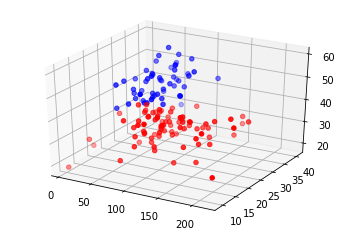

In [163]:
colores = ['red', 'blue', 'green', 'black', 'yellow']
ax = plt.axes(projection='3d')

for cluster in sorted(X['cluster'].unique()):
    ax.scatter(X[X['cluster'] == cluster]['n_palabras'], 
               X[X['cluster'] == cluster]['empatia'], 
               X[X['cluster'] == cluster]['extraversion'], 
               color=colores[cluster])

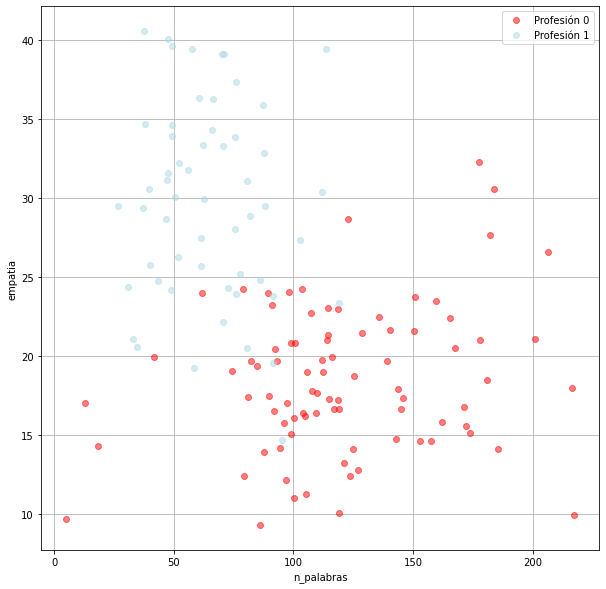

In [164]:
colors = ['r', 'lightblue', 'blue', 'green', 'grey', 'yellow', 'm', 'k', 'pink']

plt.figure(figsize=(10, 10))

for cluster in sorted(X['cluster'].unique()):
        plt.plot(X[X['cluster'] == cluster]['n_palabras'],
                 X[X['cluster'] == cluster]['empatia'], 
                 'o', 
                 color=colors[cluster],
                 alpha=0.5,
                 label=f'Profesión {cluster}')
plt.xlabel("n_palabras")
plt.ylabel("empatia")
plt.grid()
plt.legend();

#### Analiza los resultados

Realiza un gráfico de tarta por cada grupo que has creado para ver cuántos usuarios de cada profesión original se han identificado en cada uno de estos grupos.

¿Podemos mantener la teoría que habíamos planteado inicialmente en la que creíamos que los compañeros de profesión se comportarían de forma semejante en la red social?

In [165]:
X['cluster'].value_counts()

0    85
1    55
Name: cluster, dtype: int64

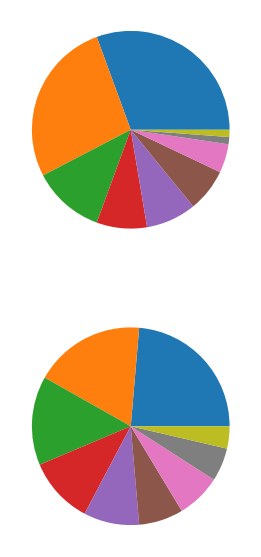

In [166]:
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].pie(df[X['cluster'] == 0]['profesion'].value_counts());
ax[1].pie(df[X['cluster'] == 1]['profesion'].value_counts());

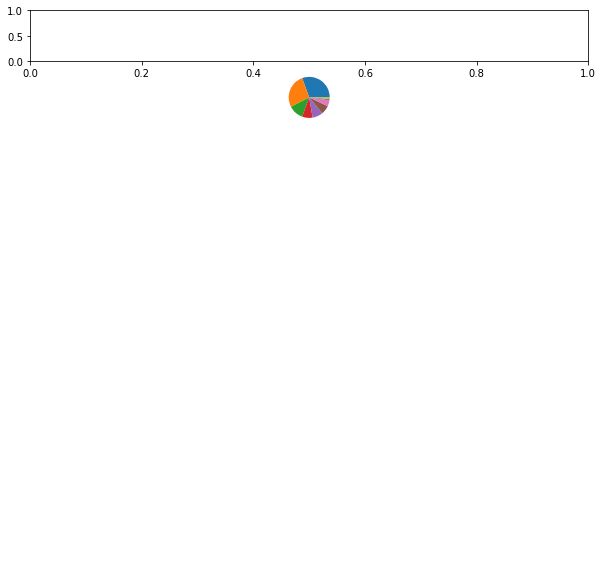

In [155]:
fig, ax = plt.subplots(9, figsize=(10, 10))

for i in range(1, 9):
    ax[i].pie(df[X['cluster'] == i]['profesion'].value_counts());

#### Repite el proceso para el algoritmo DBSCAN

1. Crea el modelo DBSCAN

2. Realiza las predicciones sobre los datos y crea de nuevo un dataframe con la forma necesaria para poder repetir los apartados anteriores.

3. Representa las agrupaciones y analiza los resultados